In [4]:
import os
import sys
from pathlib import Path

sys.path.append('/home/samer/projects/fuzzy_sql/src') #This will enable reading the modules
from fuzzy_sql.fuzzy_sql import *
from fuzzy_sql.tabular_query import TABULAR_QUERY


In [2]:
def setup_class_inputs(conn,real_file_path, metadata_file_path, syn_file_path='None', ) -> dict:
    class_inputs={}
    if os.path.isfile(real_file_path):
        real=load_csv(real_file_path)
        real_name=Path(real_file_path).stem

        make_table(real_name, real, conn)
        class_inputs['real_data_name']=copy.deepcopy(real_name)
        class_inputs['real_data']=copy.deepcopy(real)
    else:
        raise Exception('The file {} does not exist !'.format(real_file_path))

    if os.path.isfile(metadata_file_path):
        metadata=get_metadata(metadata_file_path)
        class_inputs['metadata_dict']=copy.deepcopy(metadata)
    else:
        raise Exception('The file {} does not exist'.format(metadata_file_path))

    if syn_file_path != 'None':
        if os.path.isfile(syn_file_path):
            syn=load_csv(syn_file_path)
            syn_name=Path(syn_file_path).stem
            # Load syn data into the database
            make_table(syn_name, syn, conn)
            class_inputs['syn_data_name']=copy.deepcopy(syn_name)
            class_inputs['syn_data']=copy.deepcopy(syn)
        else:
            raise Exception('The file {}.csv does not exist!'.format(syn_file_path))

    return class_inputs

In [6]:
#set paths
root_dir=Path(os.getcwd()).parent
real_path=os.path.join(root_dir,'data/tabular/ready/real/C1.csv')
meta_path=os.path.join(root_dir,'data/tabular/ready/metadata/C1.json')
syn_path=os.path.join(root_dir,'data/tabular/ready/synthetic/C1_syn_06.csv')
runs_dir=os.path.join(root_dir,'.runs')

In [5]:
agg_fntn=True
conn = sqlite3.connect('fuzzy_sql.db')
class_inputs=setup_class_inputs(conn,real_path,meta_path,syn_path)
testq=TABULAR_QUERY(conn,class_inputs['real_data_name'], class_inputs['metadata_dict'])

Table C1 already exists in the database
Table C1_syn_06 already exists in the database


In [6]:
#where_vars=['age','education','income','capital']
#testq._gen_single_aggfltr_expr(where_vars, agg_fntn=True)
queries=testq.gen_twin_aggfltr_queries(100, class_inputs['syn_data_name'], agg_fntn=agg_fntn)
scored_queries=testq.get_agg_metrics(queries)

Generated Conditioned Aggregate Query 0 
Generated Conditioned Aggregate Query 1 
Generated Conditioned Aggregate Query 2 
Generated Conditioned Aggregate Query 3 
Generated Conditioned Aggregate Query 4 
Generated Conditioned Aggregate Query 5 
Generated Conditioned Aggregate Query 6 
Generated Conditioned Aggregate Query 7 
Generated Conditioned Aggregate Query 8 
Generated Conditioned Aggregate Query 9 
Generated Conditioned Aggregate Query 10 
Generated Conditioned Aggregate Query 11 
Generated Conditioned Aggregate Query 12 
Generated Conditioned Aggregate Query 13 
Generated Conditioned Aggregate Query 14 
Generated Conditioned Aggregate Query 15 
Generated Conditioned Aggregate Query 16 
Generated Conditioned Aggregate Query 17 
Generated Conditioned Aggregate Query 18 
Generated Conditioned Aggregate Query 19 
Generated Conditioned Aggregate Query 20 
Generated Conditioned Aggregate Query 21 
Generated Conditioned Aggregate Query 22 
Generated Conditioned Aggregate Query 23 
Ge

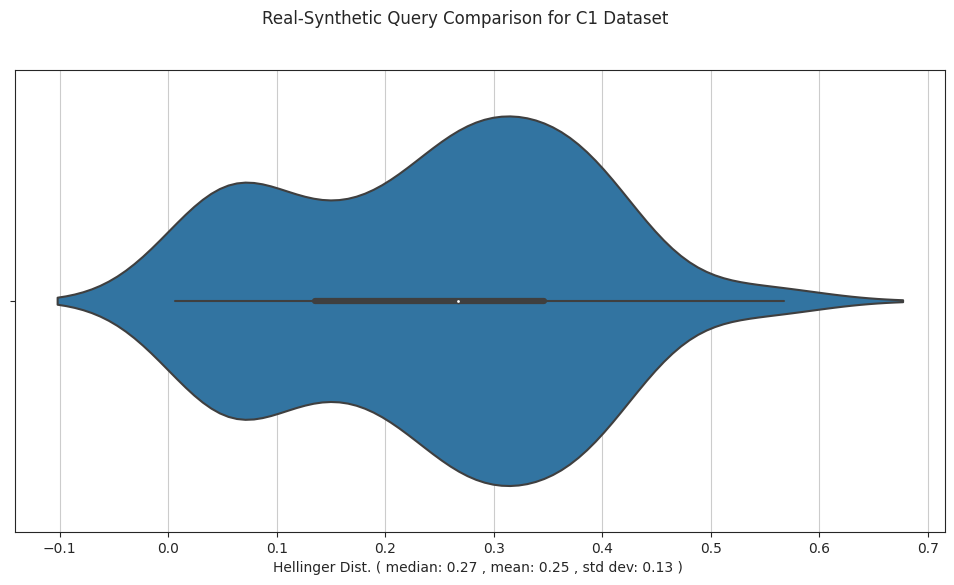

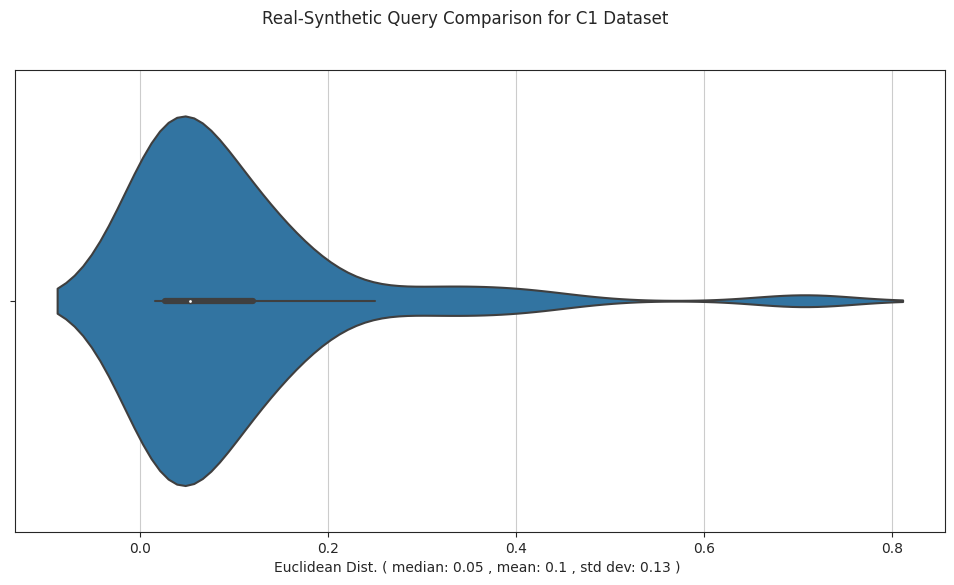

In [7]:
with open(runs_dir+'/sql.html', 'w') as file_writer:
    print_twin_agg_queries(scored_queries, file_writer)
# if os.name=='posix':
#     pdf.from_file('sql.html','sql.pdf')
hlngr_stats=calc_stats(scored_queries['hlngr_dist'])
fig=plot_violin(np.array(scored_queries['hlngr_dist']),'Hellinger Dist.','Real-Synthetic Query Comparison for {} Dataset'.format(testq.REAL_TBL_NAME),hlngr_stats)
fig.savefig(runs_dir+'/hlngr.png')
if agg_fntn:
    ecldn_stats=calc_stats(scored_queries['ecldn_dist'])
    fig=plot_violin(np.array(scored_queries['ecldn_dist']),'Euclidean Dist.','Real-Synthetic Query Comparison for {} Dataset'.format(testq.REAL_TBL_NAME),ecldn_stats)
    fig.savefig(runs_dir+'/ecldn.png')    

# Testing fuzz_tabular

In [20]:
import os
import sys
from pathlib import Path

sys.path.append('/home/samer/projects/fuzzy_sql/src') #This will enable reading the modules
from fuzzy_sql.fuzzy_sql import *
from fuzzy_sql.tabular_query import TABULAR_QUERY

In [21]:
#set paths
root_dir=Path(os.getcwd()).parent
real_path=os.path.join(root_dir,'data/tabular/ready/real/C24.csv')
meta_path=os.path.join(root_dir,'data/tabular/ready/metadata/C24.json')
syn_path=os.path.join(root_dir,'data/tabular/ready/synthetic/C24_syn_06.csv')
runs_dir=os.path.join(root_dir,'.runs')

Table C24 already exists in the database
Table C24_syn_06 already exists in the database
Generated Conditioned Aggregate Query 0 
Generated Conditioned Aggregate Query 1 
Generated Conditioned Aggregate Query 2 
Generated Conditioned Aggregate Query 3 
Generated Conditioned Aggregate Query 4 
Generated Conditioned Aggregate Query 5 
Generated Conditioned Aggregate Query 6 
Generated Conditioned Aggregate Query 7 
Generated Conditioned Aggregate Query 8 
Generated Conditioned Aggregate Query 9 
Generated 10 random twin queries and saved results in: ../.runs/C24_1663785354


{'query_real': [  Risk1Yr  AVG(`PRE4`)  COUNT(*)
  0   FALSE     3.298525       400
  1    TRUE     3.185143        70,
      PRE30 PRE25   DGN PRE8 PRE17 PRE11 PRE32 PRE10 PRE19 PRE7 PRE14  PRE6  \
  0       0     0  DGN2    0     0     0     0     0     0    0  OC12  PRZ0   
  1       0     0  DGN2    0     0     0     0     1     0    0  OC12  PRZ0   
  2       0     0  DGN3    0     0     0     0     0     0    0  OC11  PRZ0   
  3       0     0  DGN3    0     0     0     0     0     0    0  OC11  PRZ1   
  4       0     0  DGN3    0     0     0     0     0     0    0  OC12  PRZ0   
  ..    ...   ...   ...  ...   ...   ...   ...   ...   ...  ...   ...   ...   
  193     1     1  DGN3    0     0     1     0     1     0    0  OC12  PRZ1   
  194     1     1  DGN3    0     1     0     0     1     0    0  OC11  PRZ1   
  195     1     1  DGN3    0     1     0     0     1     0    0  OC12  PRZ1   
  196     1     1  DGN3    1     0     1     0     0     0    0  OC11  PRZ0   
  197     1

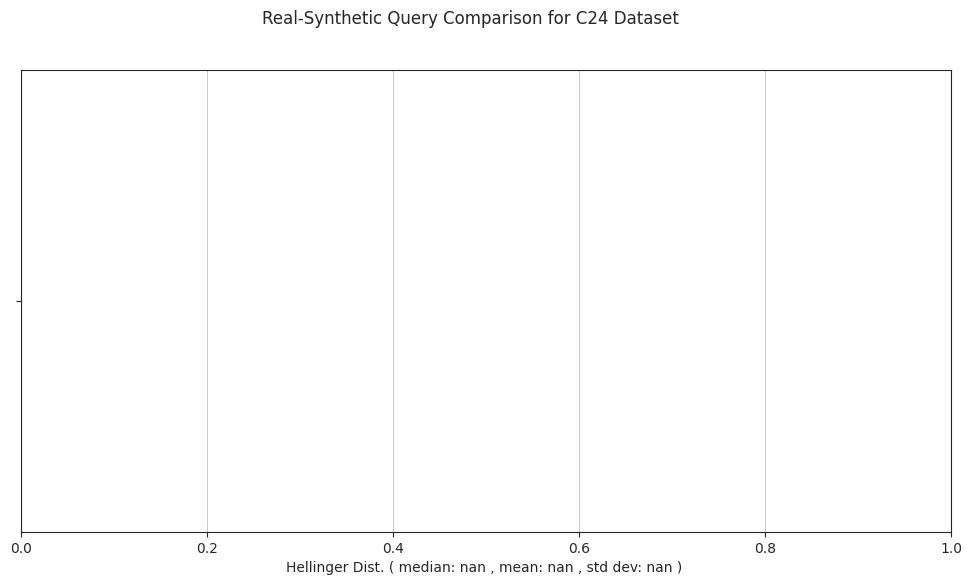

In [19]:
# Test fuzz tabular
fuzz_tabular(100, 'twin_aggfltr', real_path, meta_path,syn_path,run_folder='../.runs', printme=True)